
# Exercise 1

Make a map of some Earthquake data superimposed on a grayscale of the topography.
You can choose your own projection, how much data, how to colour the data etc.

**If you want to keep this map ... save it and download the image to your machine**

In [18]:
# First ... you will probably need all of these

import cartopy
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt

# A general library for reading image files and converting to arrays etc
import imageio

# The universal solvent for arrays (and hence images).
import numpy as np

In [19]:
# Use these cells to grab the data / images you need

# e.g.   

eq_events_by_year = np.load('../+Data/events_4.5+by_year_1970-2019.npy', allow_pickle=True).item()

# and ... 

topography_imgfile = imageio.imread("../+Data/Etopo1_3600x1800.tif")

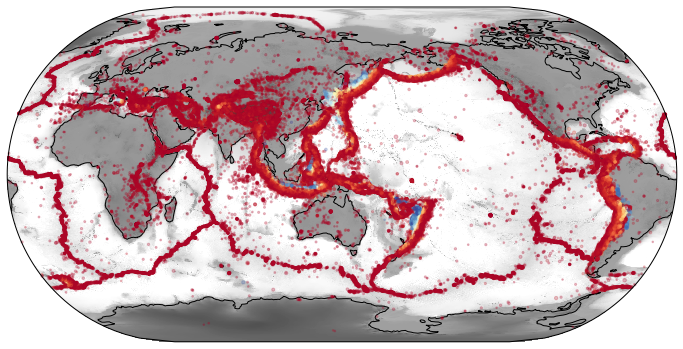

In [20]:
fig=plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.axes(projection=ccrs.EckertIII(central_longitude=140))

ax.imshow(topography_imgfile, origin='upper', 
          transform=ccrs.PlateCarree(), 
          extent=[-180,180,-90,90],
          cmap=matplotlib.cm.gray_r, vmin=-5000, vmax=5000, alpha=0.75,
          zorder=0)

ax.coastlines(zorder=1)

for year in eq_events_by_year:
    eqs = eq_events_by_year[year]
    ax.scatter(eqs[:,0], eqs[:,1], c=eqs[:,2], cmap=matplotlib.cm.RdYlBu, 
               s=(eqs[:,3]-4.0)*5.0, transform=ccrs.Geodetic(), alpha=0.25, zorder=2)


plt.show()
plt.close()

### Caption

This uses a projection of the whole globe onto one map and is centred on the region of maximum seismicity (Western Pacific). Earthquakes are shown with circles that are coloured by depth, sized by magnitude, and are layered oldest first with some transparency to allow them to blend together into a smooth picture.